# High energy protons

## Summary

Protons have a rest mass equivalent to an energy of around 938 MeV. As the proton is accelerated, due to special relativistic effects, their mass increases. In order to understand the physics at conditions close to the Big Bang, particle accelerators such as the Large Hadron Collider (LHC) accelerates protons and other charged particles close to the speed of light. For example in LHC, protons are accelerated to energies of 7 TeV, i.e. ~7000 times their rest mass. Due to this increase in their mass/energy their behaviour in a gravitational field will be modified. Here we study these effects as the proton's velocity approaches the speed of light. We extend this discussion to Planck energies and look at the feasibility of the universe having gone through a Planck epoch.


In [ ]:
# Import relevant packages and constants
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.constants.si import c, G, m_p, m_e, e, eps0, h, hbar
from astropy.cosmology import WMAP9 as cosmo
# c   = speed of light
# e   = charge of proton
# eps0= Vacuum electric permittivity
# G   =  universal gravatational constant
# h   = Planck's constant
# hbar= reduced Planck's constant
# m_e =  rest mass of electron
# m_p =  rest mass of proton

## 1.Introduction
The gravitational force between two protons of mass $m_p$ separated by a distance $r$ is given by the Newton's law as:

$F_g = \frac{G m_p^2}{r^2} \quad (1)$

For instance, two protons separated by a distance of 1 fm (typical nuclear scale) will experience a attractive force of $1.87 \times 10^{-34} N$.

In [ ]:
# Let r be the separation of 1 fm 
r = (1*u.fm).to(u.m) 
# The Gravitational force Fg between two protons
Fg = (G * m_p * m_p) / (r * r) 
print(f"Gravitational force between two protons of mass {m_p:.2e} at a distance {r} = {Fg:.2e}") 

Gravitational force between two protons of mass 1.67e-27 kg at a distance 1e-15 m = 1.87e-34 kg m / s2


This is beyond the experimental limit of force that can be detected, which is $10^{-24}$ N  [(Biercuk et al. 2010)](https://arxiv.org/abs/1004.0780v2).

For the gravitational force between two particles at a distance of 1 fm to be equal to this observable limit, their mass has to be $1.22 \times 10^{-22} kg$. For protons to have such a high mass they have to accelerated to higher speeds.



In [ ]:
# Let F_el be the experimental limit of detectable force
F_el = (1e-24*u.N).decompose()
# The mass at the experimental limit m_el
m_el = ((F_el * r * r)/G)** 0.5
print(f"The mass of particles separated by a distance of {r} at the experimental detection limit = {m_el:.2e}") 

The mass of particles separated by a distance of 1e-15 m at the experimental detection limit = 1.22e-22 kg


Another fundamental parameter associated with the proton is its charge. The electrostatic repulsive (Coulomb) force between two protons of charge $e$ separated by a distance $r$ is given by:

$F_e = k_e \frac{e^2}{r^2} \quad (2)$

where $k_e = 9\times 10^{9} N m^2/C^2$ is the permitivity constant. In SI units, $F_e = 2.31 \times 10^{2} C^2/(F m)$.


In [ ]:
# Let ke be the Coulomb constant and e the charge
ke = 1/(4*np.pi*eps0) 
# The Coulomb force Fe between two protons:
Fe = (ke * e.si * e.si) / (r * r) 
print(f"Coulomb repulsive force between two protons of chrage {e.si:.2e} at a distance {r} = {Fe:.2e}") 

Coulomb repulsive force between two protons of chrage 1.60e-19 C at a distance 1e-15 m = 2.31e+02 C2 / (F m)


The electrostatic force between two protons is 36 orders greaters than the gravitational force.

For the Gravitation force to be equal to Coulomb force between two protons, i.e. $\frac{G m_p^{'2}}{r^2}=\frac{k_e e^2}{r^2}$, the mass of the proton should be

$ m'_p=\sqrt{\frac{k_e e^2}{G}} = 1.86 \times 10^{-9}\quad(3)$ 

In [ ]:
# Let mpp be the mass where Gravitational and elctrostatic force becomes equal
mpp = np.sqrt((ke * e.si * e.si) / G )
mpp = mpp.decompose()
print(f"Mass of proton when gravity balances electrostatic repulsion  = {mpp:.2e}") 

Mass of proton when gravity balances electrostatic repulsion  = 1.86e-09 kg


Due to special relativistic effcts, as a particle of rest mass ($m_0$) travels with a velocity ($v$) close to the speed of light ($c$), its mass increases by a factor $\gamma$ given by:

$\gamma=\frac{1}{\sqrt(1-v^2/c^2)} \quad(4)$

The increased mass ($m$) is given by

$m= \gamma m_0 \quad (5)$ 

For instance at the limit of detection the mass of proton $10^{-22} kg$ corresponds to a $\gamma$ of 73000.

## 2. Relativistic effects

### Q 2.1 
How does the mass of the proton increase as its velocity tends to $c$? 

For protons of rest mass $m_p$, the mass is given as $m'_p=\gamma m_p$. From equations (4) & (5), we obtain the following expression for the velocity of high energy protons

$v = c\sqrt{1-(m_p/m_p')^2} \quad(6)$ 

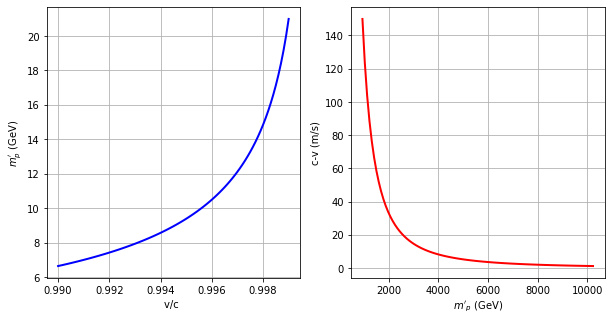

In [ ]:
# Calculating the mass (in GeV) as a function of velocity (in units of c)
# Set the range and stepsize of velocity in units of c
v = np.arange(start=0.99, stop=0.999, step=.0001)*c
# Calculate the gamma factor and mass
gamma = 1/(np.sqrt(1-(v*v)/(c*c)))
mpp = m_p * gamma

# Set the range and stepsize of mass in units of m_p
mpv = np.arange(start=1000, stop=11000, step=100)*m_p
# Calculate the velocity
vv = c * np.sqrt(1 - (m_p/mpv)**2)

# Make the plots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
#fig.suptitle('Variation with c')
# Variation of proton mass with velocity
ax1.plot(v/c, (mpp * c *c).to(u.GeV),lw=2,c='b')
ax1.set_xlabel('v/c ')
ax1.set_ylabel("$m_p'$ (GeV)")
ax1.grid(True)
# Difference in proton speed and light speed as a fucntion of proton mass
ax2.plot( (mpv * c *c).to(u.GeV),(c-vv),lw=2,c='red')
ax2.set_xlabel("$m'_p$ (GeV)")
ax2.set_ylabel("c-v (m/s)")
ax2.grid(True)
plt.show()

### Q 2.2 
Given the above difference in the speeds of the proton and light, what will be the separation between these high energy proton and photon after:


1.   one year?
2.   Hubble time?
---
Hubble time is the age of the universe ~ 13.8 Billion years, inverse of which gives the Hubble's constant $H_0$.

In [ ]:
# Table of c - v as a function of mass
cmv = c - v
# Calculate the separation over a year
dist = cmv*u.year
disty = dist.decompose() 

# Calculate the Hubble time
t_h = 1/cosmo.H(0).decompose() 
print(f"Hubble constant = {cosmo.H(0):.2f}")
print(f"Hubble time = {t_h:.2e}")
print("-"*60)
sep = cmv*t_h
seph = sep.decompose() 

print("   mp \t\t     c-v  \t sep. (1yr)    sep. (Hubble)")
print("-"*60)
for i in range(0,len(cmv),10):
  mpgev = (mpv * c *c).to(u.GeV)[i]
  print(f"{mpgev:8.2f} {cmv[i]:10.2}  {disty[i]:10.2} {seph[i]:10.2}")

Hubble constant = 69.32 km / (Mpc s)
Hubble time = 4.45e+17 s
------------------------------------------------------------
   mp 		     c-v  	 sep. (1yr)    sep. (Hubble)
------------------------------------------------------------
  938.27 GeV      3e+06 m / s     9.5e+13 m    1.3e+24 m
 1876.54 GeV    2.7e+06 m / s     8.5e+13 m    1.2e+24 m
 2814.82 GeV    2.4e+06 m / s     7.6e+13 m    1.1e+24 m
 3753.09 GeV    2.1e+06 m / s     6.6e+13 m    9.3e+23 m
 4691.36 GeV    1.8e+06 m / s     5.7e+13 m      8e+23 m
 5629.63 GeV    1.5e+06 m / s     4.7e+13 m    6.7e+23 m
 6567.90 GeV    1.2e+06 m / s     3.8e+13 m    5.3e+23 m
 7506.18 GeV      9e+05 m / s     2.8e+13 m      4e+23 m
 8444.45 GeV      6e+05 m / s     1.9e+13 m    2.7e+23 m
 9382.72 GeV      3e+05 m / s     9.5e+12 m    1.3e+23 m


### Q 2.3
What will be gamma factor and mass of the proton when the separation after Hubble time is Compton length? 

---

The Compton wavelength ($\lambda_c$) of a particle is same as the wavelength of a photon having the same energy as the mass (energy) of the particle and is given by:

$\lambda_c = \frac{h}{m_p c} \quad (7)$.

Now we have:
$(c-v)/H_0 = \lambda_c \quad (8)$,

so the expression for $\gamma$ then becomes:

$\gamma = \left[1-(1-(\lambda_c H_0/c)^2)^{-1/2}\right] \quad (9)$.

Since $(\lambda_c H_0/c)\sim 10^{-41} << 1$, we can expand eqaution (9) binomially and neglect the higher order terms to get:

$\gamma = (2 \lambda_c H_0 /c)^{-1/2} \quad (10)$.


In [ ]:
# Calculate the Compton length of a proton
cl = h/(m_p * c) 
print(f"Compton Length = {cl.decompose():.2e}")
H0 = cosmo.H(0).decompose()
#gamma at Compton Length
gcl = (2*cl * H0 /c ) ** (-0.5) 

print(f"Gamma factor at Compton Length = {gcl:.2e}")
print(f"Proton mass at Compton Length = {gcl * m_p:.2e}")

# Calculate the Planck mass
mpl = (hbar * c / G) ** 0.5
print(f"Plank mass = {mpl.decompose():.2e}")

Compton Length = 1.32e-15 m
Gamma factor at Compton Length = 2.25e+20
Proton mass at Compton Length = 3.76e-07 kg
Plank mass = 2.18e-08 kg


Planck mass is a unit of mass in natural units given by 
$m_{pl} = \sqrt{\frac{\hbar c}{G}} \approx 2 \times 10^{-8} kg \quad (11)$.

The proton mass when the separation over Hubble time becomes Compton length approaches the Planck mass.

## 3. Accelerating high energy protons

To accelerate these protons to such high energies,we need *Particle accelerators*, which are devices which use electromagnets to enhance their speeds. The most powerful accelerator is the Large Hadron Collider (LHC), which is a circular accelerator. To accelerate protons to such high energies, we need a linear accelerator, since in the case of a circular accelerator there is  energy loss due to synchrotron radiation. 

The most intense laser we have so far has an intensity $I \sim 10^{26} W/m^2$. This intensity is related to the electric field $E$ as   

$I = \frac{1}{2} c\epsilon_0E^2 \quad (12)$,

where $\epsilon_0$ is the permittivity of free space. This  gives an electric field given by,
$E \sim 2.7 \times 10^{14} V/m$.

For a voltage of $\sim 10^{28} V$, the linear accelerator powered by this electric field should have an arm length $l$ given by
$l = V/E \sim 4 \times 10^{13} m$.

To reduce the required arm lenght of the linear accelerator we need to increase the electric field strength. 

The maximum possible electric field strength will be that around a fundamental charge ($e=1.6\times 10^{-19} C$) at a distance of 1 fm is given by

$E_{max} = \frac{ke}{(1 fm)^2} \sim 10^{21} V/m \quad (13)$

The energy density of the laser is given by 

$\epsilon = \frac{e V}{l w^2} \quad (14)$, 

where $w$ beam-width of the laser.





### Q 3.1
Calculate the energy density of the beam of width $10^{-7}~m$ (wavelength of the beam).

In [ ]:
# Width of the beam (wavelength of the laser) w = 10^-7 m
# Volume of the beam w^2 * l = 10^-7 m
w = 1.e-7 *u.m 
vol =  w * w * V/Emax
# Calculate the energy density
ed = (e * V /vol).to(unit=u.J/u.m**3)
print(f"Volume of the beam = {vol:.2e}")
print(f"Energy density of the beam = {ed:.2e}")

Volume of the beam = 1.21e-07 m3
Energy density of the beam = 1.32e+16 J / m3


### Q 3.2
Calculate the arm length corresponding to this electric field.


In [ ]:
# I is the intensity of the laser
I = 1.e26 *u.W/u.m**2 #W/m^2
# The corresoinding electric field E
E = (((2 * I ) / (c * eps0)) **.5).to(unit=u.V/u.m)
print(f"Electric field = {E:.2e}")
# The voltage V and arm length l
V = 1.e28 *u.V
l = V/E 
print(f"Arm length = {l:.2e}")
Emax = ((1/(4 * math.pi * eps0)) * (e / cl ** 2)).to(unit=u.V/u.m)
print(f"Maximum electric field = {Emax:.2e}")
print(f"Arm length for max E = {V/Emax:.2e}")

Electric field = 2.74e+14 V / m
Arm length = 3.64e+13 m
Maximum electric field = 8.25e+20 V / m
Arm length for max E = 1.21e+07 m


The arm length $l\sim 10^{13} m$ is roughly 100 times the distance between the earth and the sun (100 Astronomical Units). 

A particle of charge $e$ moving with velocity $v$ moving in a magnetic field $B$ gets deflected due to the Lorentz force, tracing a circular path of radius

$r = \gamma \frac{m v}{e B} \quad (15)$.

Since the arm length of these accelerators need to be quite large, the particles will be affected by the galactic magnetic field ($10^{-6} G$)



### Q 3.3
Calculate the radius of the high energy proton  in the galactic magnetic field at energies:

a. at 7 TeV (LHC energies)

b. at Planck energy.





In [ ]:
# From equation (6)
# vg: velocity as a function of gamma
vg = lambda g: c*np.sqrt(1 - (1/g)**2)
B = 10**(-10.)*u.T # in Tesla
# rb: radius of the particle as a function of gamma
rb = lambda g: (g * m_p) * vg(g) / (e * B )

# Radius at LHC energy
g1 = 7000.
print(f"Radius at LHC energy     = {rb(g1).decompose():.2e}")

# Radius at Planck energy
g2 = 10**18. 
print(f"Radius at Planck energy  = {rb(g2).decompose():.2e}")

Radius at LHC energy     = 2.19e+14 m
Radius at Planck energy  = 3.13e+28 m


Note: The radius at the LHC energy is one $10^6$ times smaller than that of the Milky Galaxy ($10^{20} m$), while at the Planck energy, it is $10^8$ times larger. 

Since the accerlerator required to produce Planck energies is untenable and not practical it is unlikely that we can test theories involving energy scales at Planck epoch.